In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
df=pd.read_csv('./datasets/Loan_Default.csv')
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


## Data understanding

1) **ID** - унікалький ідентифікатор кредиту (видалити, оскільки не несе цінності для моделі)
2) **year** - рік оформлення кредиту (видалити оскільки константна ознака) 
3) **loan_limit** - чи перевищує кредит ліміт, встановлений банком
4) **Gender** - стать клієнта (видалити, для запобігання упередженості моделі)
5) **approv_in_adv** - чи був підтверджений кредит попередньо
6) **loan_type** - тип кредиту (видалити, оскільки там невідповідні категоріальні значення)
7) **loan_purpose** - ціль кредиту (видалити, оскільки там невідповідні категоріальні значення)
8) **Credit_Worthiness** - рівень кредитоспроможності клієнта (цільова змінна)
9) **open_credit** - чи оформлені на клієнта інші кредити
10) **business_or_commercial** - тип кредиту, тобто комерційний, чи бізнес
11) **loan_amount** - сума кредиту
12) **rate_of_interest** - відсоткова ставка кредиту
13) **Interest_rate_spread** - різниця, між відсотковою ставкою кредиту та відсотковою ставкою визначеною нацбанком
14) **Upfront_charges** - початковий платіж за оформлення кредиту, може включати податки за різні додаткові послуги необхідні при оформленні 
15) **term** - термін кредиту, у місяцях
16) **Neg_ammortization** - чи присутня негативна амортизація у кредиті
17) **interest_only** - спочатку клієнт має оплатити відсотки, чи звичайний кредит
18) **lump_sum_payment** - чи може клієнт оплатити за кредит одним платижем
19) **property_value** - вартість майна клієнта
20) **construction_type** - власність збудована вручну, чи зі модулів
21) **occupancy_type** - для яких цілей використовується нерухомості
22) **Secured_by** - тип застави, що захищає кредит
23) **total_units** - кількість housing units нерухомості
24) **income** - дохід клієнта
25) **credit_type** - кредитне бюро (видалити, оскільки для розуміння значення колонки, необхідні багато фінансових знань)
26) **Credit_Score** - кредитний рахунок клієнта
27) **co-applicant_credit_type** - видалити, оскільки для розуміння значення колонки, необхідні багато фінансових знань
28) **age** - вік клієнта (видалити, для запобіганню упередженості моделі)
29) **submission_of_application** - кредитна заявка була затверджена фінансовою установою, чи посередником
30) **LTV** - відношення суми позики, до вартості застави
31) **Region** - сторона світу (видалити, оскільки не зрозуміло, що цк конкретно)
32) **Security_Type** - застава кредиту пряма, чи через посередника
33) **Status** - статус (видалити, оскільки не зрозуміло, це статус чого)
34) **dtir1** - відношення суми позики до доходу

In [24]:
cols_to_drop=['ID','year','co-applicant_credit_type','Gender','loan_type','loan_purpose','credit_type','age','Region','Status']
df=df.drop(cols_to_drop,axis=1,errors='ignore')
df

,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,...,construction_type,occupancy_type,Secured_by,total_units,income,Credit_Score,submission_of_application,LTV,Security_Type,dtir1
0,cf,nopre,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,...,sb,pr,home,1U,1740.0,758,to_inst,98.728814,direct,45.0
1,cf,nopre,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,...,sb,pr,home,1U,4980.0,552,to_inst,NaN,direct,NaN
2,cf,pre,l1,nopc,nob/c,406500,4.560,0.2000,595.00,360.0,...,sb,pr,home,1U,9480.0,834,to_inst,80.019685,direct,46.0
3,cf,nopre,l1,nopc,nob/c,456500,4.250,0.6810,NaN,360.0,...,sb,pr,home,1U,11880.0,587,not_inst,69.376900,direct,42.0
4,cf,pre,l1,nopc,nob/c,696500,4.000,0.3042,0.00,360.0,...,sb,pr,home,1U,10440.0,602,not_inst,91.886544,direct,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,nopre,l1,nopc,nob/c,436500,3.125,0.2571,9960.00,180.0,...,sb,pr,home,1U,7860.0,659,to_inst,71.792763,direct,48.0
148666,cf,nopre,l1,nopc,nob/c,586500,5.190,0.8544,0.00,360.0,...,sb,ir,home,4U,7140.0,569,not_inst,74.428934,direct,15.0
148667,cf,nopre,l1,nopc,nob/c,446500,3.125,0.0816,1226.64,180.0,...,sb,pr,home,1U,6900.0,702,not_inst,61.332418,direct,49.0
148668,cf,nopre,l1,nopc,nob/c,196500,3.500,0.5824,4323.33,180.0,...,sb,pr,home,1U,7140.0,737,to_inst,70.683453,direct,29.0


## Data preparation

### Missing values

In [25]:
with_missing=[]
for col in df.columns:
    if df[col].isnull().sum()!=0:
        print(col)
        with_missing.append(col)

loan_limit
approv_in_adv
rate_of_interest
Interest_rate_spread
Upfront_charges
term
Neg_ammortization
property_value
income
submission_of_application
LTV
dtir1


In [26]:
for col in with_missing:
    print(df[col].value_counts(),'\n')

loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64 

approv_in_adv
nopre    124621
pre       23141
Name: count, dtype: int64 

rate_of_interest
3.990    14455
3.625     8800
3.875     8592
3.750     8474
3.500     6866
         ...  
4.700        1
8.000        1
7.750        1
5.300        1
2.700        1
Name: count, Length: 131, dtype: int64 

Interest_rate_spread
-0.0280    77
-0.0380    64
-0.0230    60
-0.1730    56
-0.1480    52
           ..
-0.1791     1
 1.5268     1
 1.3850     1
 1.4201     1
-0.3247     1
Name: count, Length: 22516, dtype: int64 

Upfront_charges
0.00       20770
1250.00     1184
1150.00      892
795.00       487
295.00       403
           ...  
4447.72        1
3173.84        1
3421.81        1
198.96         1
4323.33        1
Name: count, Length: 58271, dtype: int64 

term
360.0    121685
180.0     12981
240.0      5859
300.0      2822
324.0      2766
120.0       510
144.0       263
348.0       260
336.0       213
96.0        194
312.0  

**Types of columns**
1) rate_of_interest - numerical
2) Interest_rate_spread - numerical
3) Upfront_charges - numerical 
4) property_value - numerical
5) income - numerical
6) LTV - numerical
7) term - numerical
8) dtir1 - numerical <br/><br/>
9) loan_limit - categorical (boolean)
10) approv_in_adv - categorical (boolean)
11) Neg_ammortization - categorical (boolean)
12) submission_of_application - categorical (boolean) <br/><br/>

#### Filling categorical columns

All categorical columns im gonna fill with mode values

In [27]:
mode_columns=['loan_limit'
,'approv_in_adv'
,'Neg_ammortization'
,'submission_of_application']

for col in mode_columns:
    df[col]=df[col].fillna(df[col].mode()[0])

#### Filling numerical columns

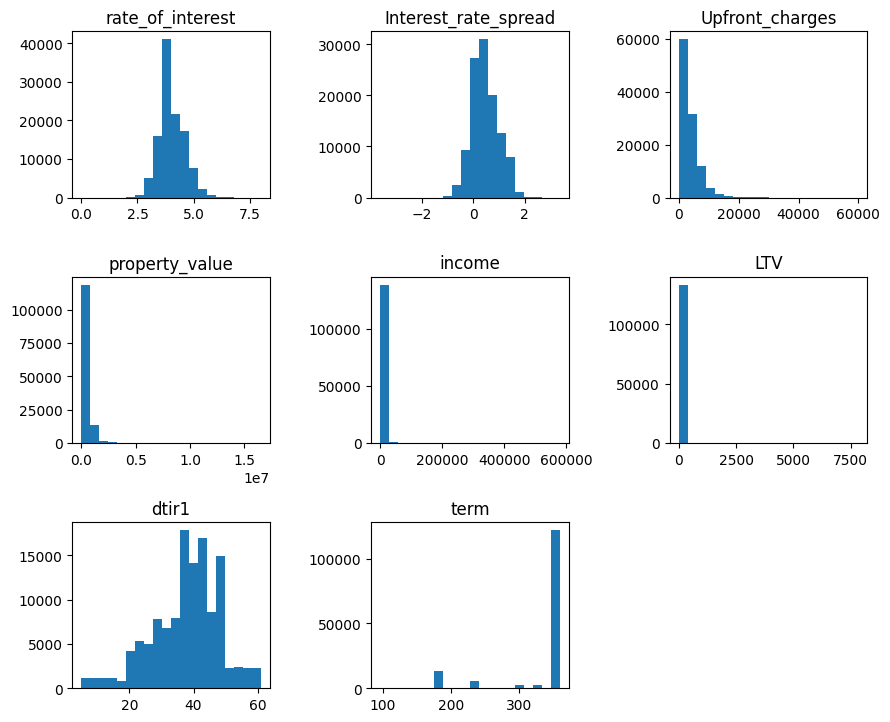

In [28]:
# Plotting distributions of numerical columns
num_cols=['rate_of_interest'
,'Interest_rate_spread'
,'Upfront_charges' 
,'property_value'
,'income'
,'LTV'
,'dtir1'
,'term']

plt.figure(figsize=(9,12))
for ind,col in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,3,ind+1)
    plt.title(col)
    plt.hist(df[col],bins=20)
plt.tight_layout()
plt.show()

Im going to fill numerical columns with median values, because none of them have normal distribution

In [29]:
for col in num_cols:
    df[col]=df[col].fillna(df[col].median())

In [30]:
print(df.isnull().sum())

loan_limit                   0
approv_in_adv                0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
Credit_Score                 0
submission_of_application    0
LTV                          0
Security_Type                0
dtir1                        0
dtype: int64


### Categorical encoding

In [31]:
for col in df.columns:
    print(col,df[col].unique(),'\n')

loan_limit ['cf' 'ncf'] 

approv_in_adv ['nopre' 'pre'] 

Credit_Worthiness ['l1' 'l2'] 

open_credit ['nopc' 'opc'] 

business_or_commercial ['nob/c' 'b/c'] 

loan_amount [ 116500  206500  406500  456500  696500  706500  346500  266500  376500
  436500  136500  466500  226500   76500  356500  156500  586500  306500
  316500  336500  426500  476500  196500  186500  246500  216500  506500
  656500  256500  396500  166500  236500  866500  416500  386500  596500
  606500   86500  286500  146500  446500  636500  486500  326500   56500
  906500  496500  106500  126500  296500  176500 1376500  566500  686500
  556500  676500  366500  276500  716500   66500  616500   96500  826500
   26500  666500  546500  986500  526500 1226500  726500 1486500 1416500
  536500  796500  516500   46500  876500  576500  626500 1506500  886500
  816500  646500  776500  746500  736500  896500  836500  806500 1386500
  976500  926500  786500  766500 1176500 2006500  756500 1136500  966500
 1356500 1056500 1546500 

**Categorical columns**
1) loan limit - boolean 
2) approved in advance - boolean
3) open credit - boolean
4) lump sum payment - boolean
5) business or commertial - boolean
6) negative ammortisation - boolean
7) interest only - 2 values 
8) submission of application - 2 values
9) construction site - 2 values
10) secured by - 2 values
11) security type - 2 values
12) credit worthiness - 2 values
13) occupancy type - 3 values
14) total units - 4 values

**`Mapping`** </br>
First 6 columns im going to simply map with true or false, because there in them are only two values indication whether or not credit have feature. For example open_credit opc means client have not payed credits while he or she want to get new and nopc means that client dont have any not payed credits </br></br>
**`Label encoder`** </br>
rest of columns in going to encode with labels

In [34]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

label_columns=[
'Credit_Worthiness'
,'occupancy_type'
,'interest_only'
,'total_units'
,'construction_type'
,'Secured_by'
,'submission_of_application'
,'Security_Type']

for col in label_columns:
    df[col]=encoder.fit_transform(df[col])

col_maps={
    'loan_limit':{
        'cf': True,
        'ncf': False
    },
    'approv_in_adv':{
        'nopre':False,
        'pre': True
    },
    'open_credit':{
        'nopc':False,
        'opc': True
    },
    'business_or_commercial':{
        'nob/c': False,
        'b/c': True
    },
    'lump_sum_payment':{
        'not_lpsm':False,
        'lpsm': True
    },
    'Neg_ammortization':{
        'not_neg': False,
        'neg_amm': True
    }
}

for col,mapping in col_maps.items():
    df[col]=df[col].apply(lambda x: mapping.get(x,x))

In [42]:
df[label_columns+list(col_maps.keys())]

,Credit_Worthiness,occupancy_type,interest_only,total_units,construction_type,Secured_by,submission_of_application,Security_Type,loan_limit,approv_in_adv,open_credit,business_or_commercial,lump_sum_payment,Neg_ammortization
0,0,1,1,0,1,0,1,1,True,False,False,False,False,False
1,0,1,1,0,1,0,1,1,True,False,False,True,True,False
2,0,1,1,0,1,0,1,1,True,True,False,False,False,True
3,0,1,1,0,1,0,0,1,True,False,False,False,False,False
4,0,1,1,0,1,0,0,1,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,0,1,1,0,1,0,1,1,True,False,False,False,False,False
148666,0,0,1,3,1,0,0,1,True,False,False,False,False,False
148667,0,1,1,0,1,0,0,1,True,False,False,False,False,False
148668,0,1,1,0,1,0,1,1,True,False,False,False,False,False


### Anomalies detection

In [43]:
for col in df.columns:
    print(df[col].value_counts(),'\n')

loan_limit
True     138692
False      9978
Name: count, dtype: int64 

approv_in_adv
False    125529
True      23141
Name: count, dtype: int64 

Credit_Worthiness
0    142344
1      6326
Name: count, dtype: int64 

open_credit
False    148114
True        556
Name: count, dtype: int64 

business_or_commercial
False    127908
True      20762
Name: count, dtype: int64 

loan_amount
206500     4610
256500     4079
156500     3967
226500     3944
486500     3819
           ... 
2206500       1
1746500       1
2396500       1
3576500       1
1956500       1
Name: count, Length: 211, dtype: int64 

rate_of_interest
3.990    50894
3.625     8800
3.875     8592
3.750     8474
3.500     6866
         ...  
4.700        1
8.000        1
7.750        1
5.300        1
2.700        1
Name: count, Length: 131, dtype: int64 

Interest_rate_spread
 0.3904    36650
-0.0280       77
-0.0380       64
-0.0230       60
-0.1730       56
           ...  
 1.5268        1
-0.1791        1
 1.3850        1
 1.4

Categorical solumns dont have anomalies, such as wrong values

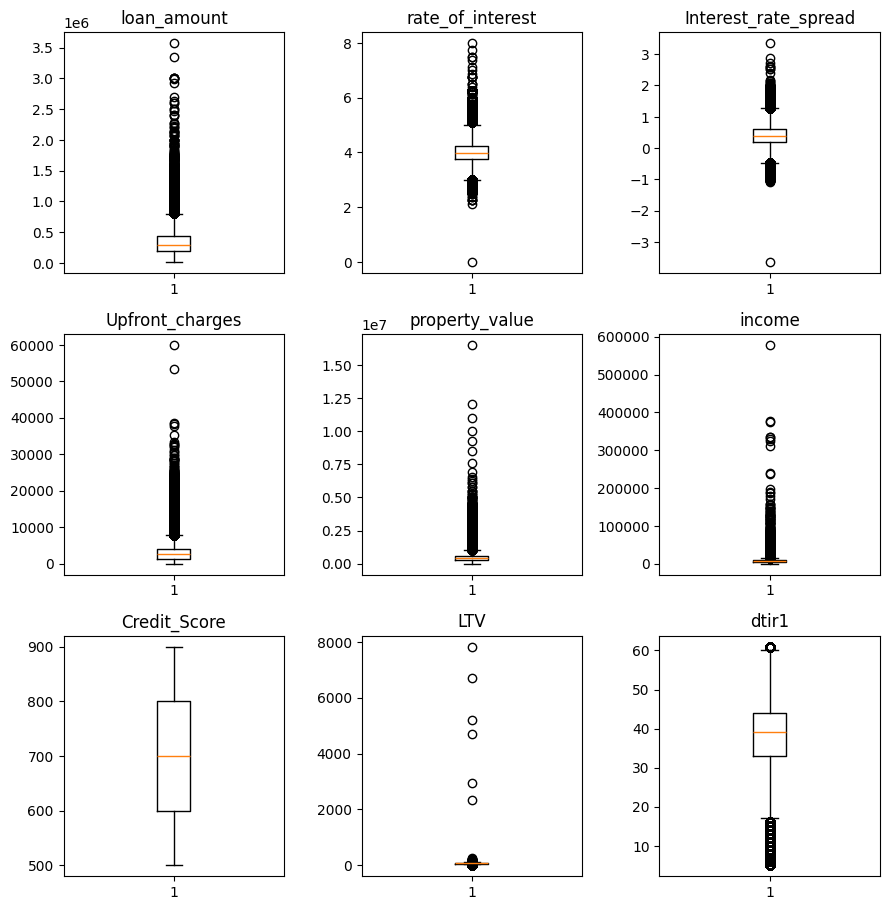

In [44]:
num_cols=[
'loan_amount'
,'rate_of_interest'
,'Interest_rate_spread'
,'Upfront_charges'
,'property_value'
,'income'
,'Credit_Score'
,'LTV'
,'dtir1']

plt.figure(figsize=(9,15))
for ind,col in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,3,ind+1)
    plt.title(col)
    plt.boxplot(df[col])
plt.tight_layout()
plt.show()

Columns with severe anomalies - loan_amount, upfront_charges,property_value,income,term <br/>
Columns with normal anomalies - rate_of_interest,interest_rate_spread,LTV

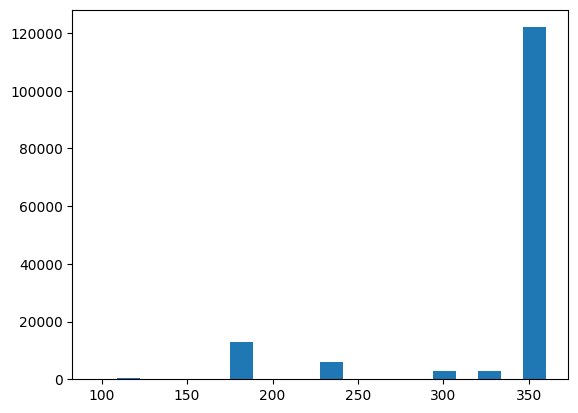

In [45]:
plt.hist(df['term'],bins=20)
plt.show()

Around 120k values from dataset are credits for 360 months, dataset have around 150k samples, so im not going to do anything because model will be trained primaraly on credits that where issued for 20 years <br/>
And for columns with average anomalies, im going to use Z-score method 

In [46]:
severe_anoms=[
    'loan_amount',
    'Upfront_charges',
    'property_value',
    'income'
]

avg_anoms=[
    'rate_of_interest',
    'Interest_rate_spread',
    'LTV'
]

df_copy_anoms_1=df.copy()

for col in severe_anoms:
    q1=df_copy_anoms_1[col].quantile(0.25)
    q3=df_copy_anoms_1[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    anomalies=(df_copy_anoms_1[col]<lower_bound)|(df_copy_anoms_1[col]>upper_bound)
    df_copy_anoms_1=df_copy_anoms_1[~anomalies]

for col in avg_anoms:
    col_mean=np.mean(df_copy_anoms_1[col])
    col_std=np.std(df_copy_anoms_1[col])
    scores=(df_copy_anoms_1[col]-col_mean)/col_std
    indxs=np.where(np.abs(scores)>3)[0]
    df_copy_anoms_1=df_copy_anoms_1[~df_copy_anoms_1.index.isin(indxs)]


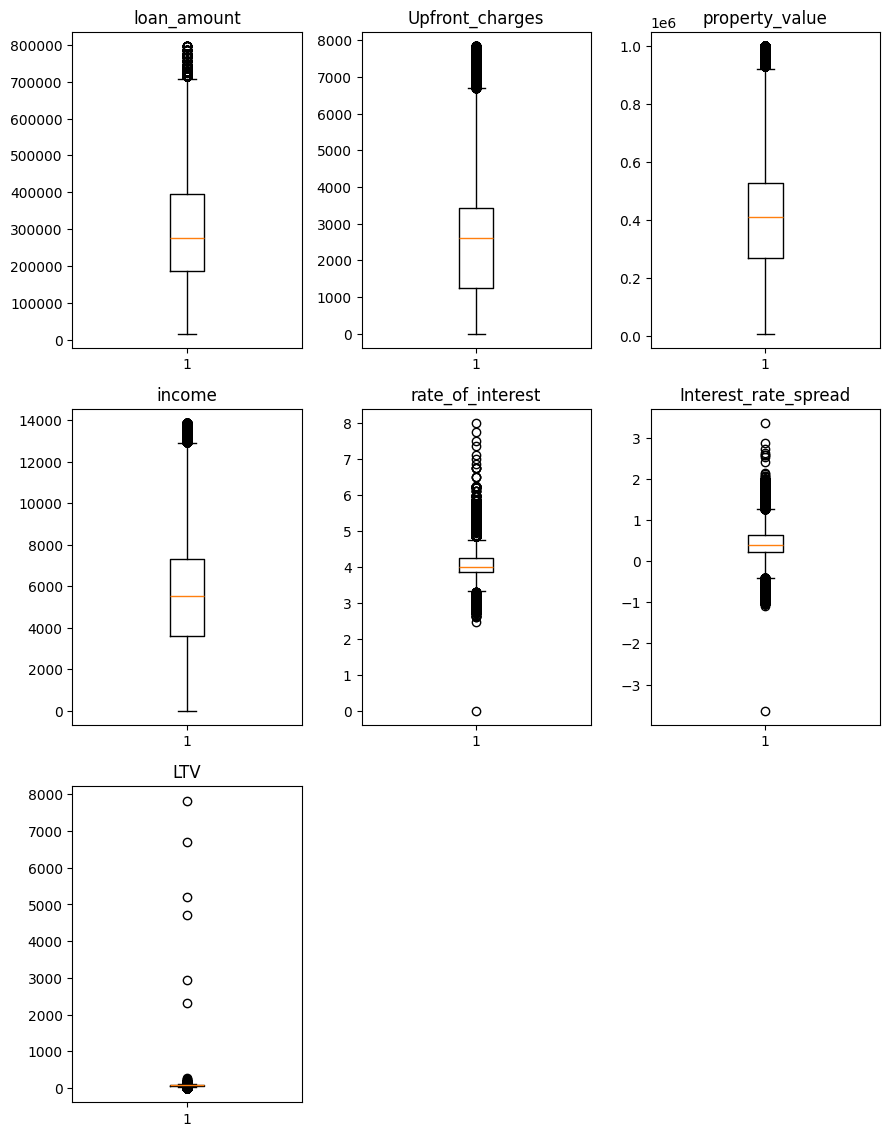

In [47]:
num_cols=severe_anoms+avg_anoms

plt.figure(figsize=(9,15))
for ind,col in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,3,ind+1)
    plt.title(col)
    plt.boxplot(df_copy_anoms_1[col])
plt.tight_layout()
plt.show()

In [48]:
len(df_copy_anoms_1)

124944

Around 25000 objects where deleted, so lets try without using iqr method, because its really harsh, and delete a lot of data

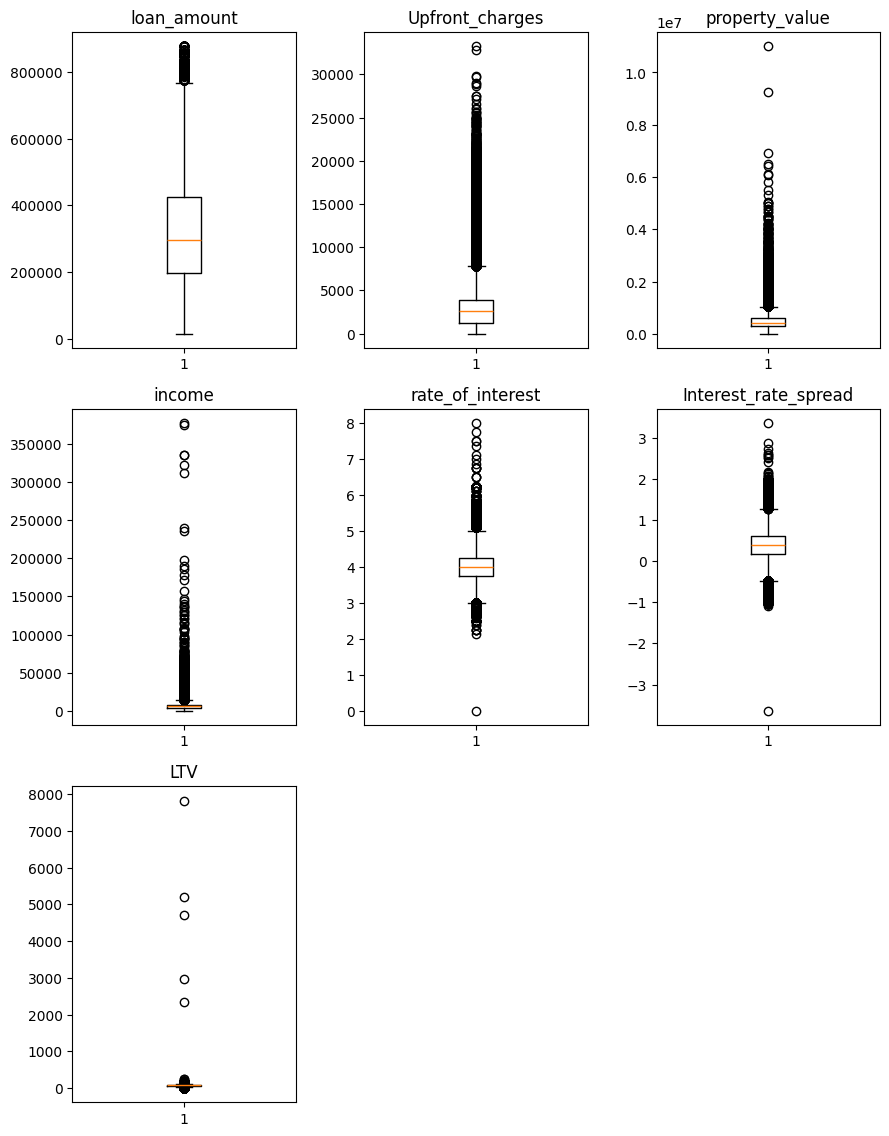

In [50]:
num_cols=severe_anoms+avg_anoms
df_copy_anoms_2=df.copy()
for col in num_cols:
    col_mean=np.mean(df_copy_anoms_2[col])
    col_std=np.std(df_copy_anoms_2[col])
    scores=(df_copy_anoms_2[col]-col_mean)/col_std
    indxs=np.where(np.abs(scores)>3)[0]
    df_copy_anoms_2=df_copy_anoms_2[~df_copy_anoms_2.index.isin(indxs)]

plt.figure(figsize=(9,15))
for ind,col in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,3,ind+1)
    plt.title(col)
    plt.boxplot(df_copy_anoms_2[col])
plt.tight_layout()
plt.show()

### Scaling

For scaling im going to use standartisation for all numeric columns

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[num_cols]=scaler.fit_transform(df[num_cols])

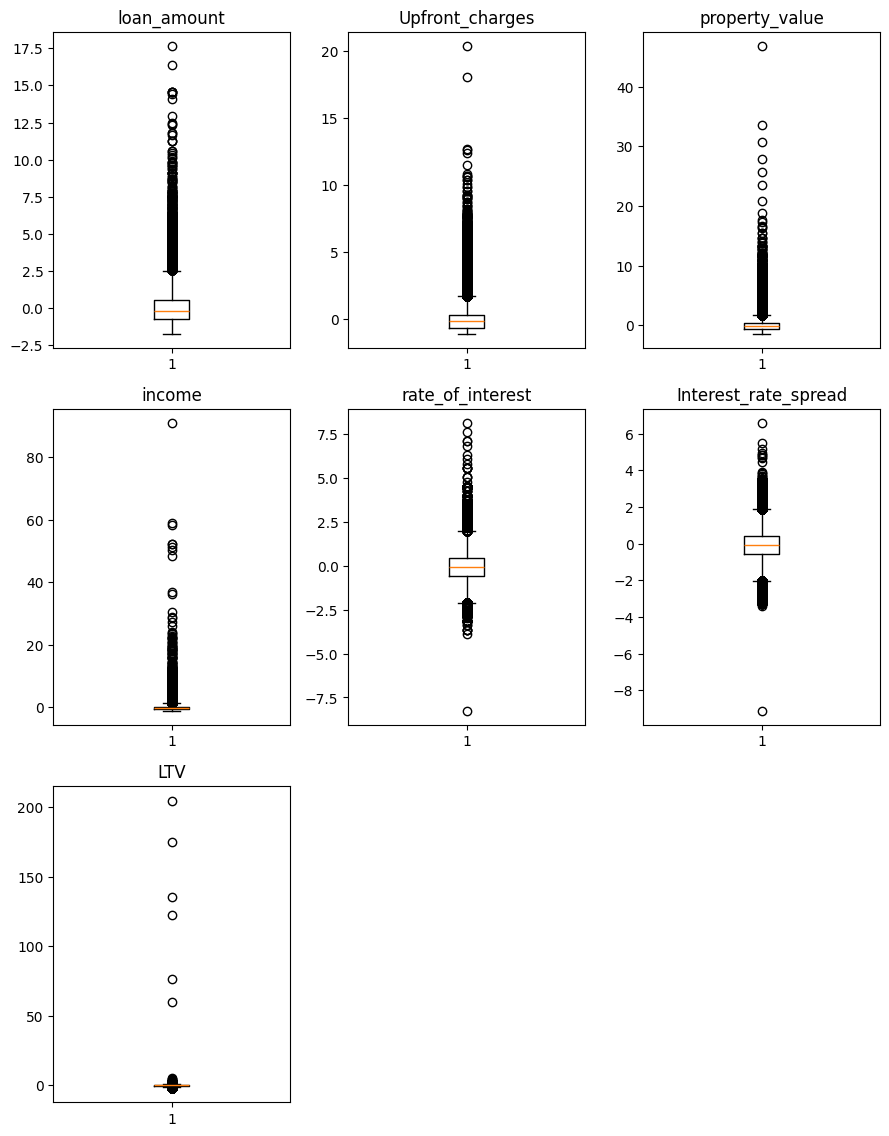

In [52]:
plt.figure(figsize=(9,15))
for ind,col in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,3,ind+1)
    plt.title(col)
    plt.boxplot(df[col])
plt.tight_layout()
plt.show()

In [53]:
# Saving prepeared data
df.to_csv('./datasets/loan_prep_data.csv')

## Model selection and training

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('./datasets/loan_prep_data.csv')
df=df.drop(['Unnamed: 0'],axis=1)
df

,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,...,construction_type,occupancy_type,Secured_by,total_units,income,Credit_Score,submission_of_application,LTV,Security_Type,dtir1
0,True,False,0,False,False,-1.166980,-0.085756,-0.086619,-0.164744,360.0,...,1,1,0,0,-0.816446,758,1,0.679317,1,45.0
1,True,False,0,False,True,-0.677607,-0.085756,-0.086619,-0.164744,360.0,...,1,1,0,0,-0.302164,552,1,0.056657,1,39.0
2,True,True,0,False,False,0.409890,1.081449,-0.513616,-0.880068,360.0,...,1,1,0,0,0.412116,834,1,0.185549,1,46.0
3,True,False,0,False,False,0.681764,0.446653,0.565089,-0.164744,360.0,...,1,1,0,0,0.793066,587,0,-0.095333,1,42.0
4,True,True,0,False,False,1.986759,-0.065279,-0.279934,-1.092723,360.0,...,1,1,0,0,0.564496,602,0,0.498737,1,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,True,False,0,False,False,0.573014,-1.857042,-0.385562,2.467009,180.0,...,1,1,0,0,0.154975,659,1,-0.031574,1,48.0
148666,True,False,0,False,False,1.388636,2.371519,0.953961,-1.092723,360.0,...,1,0,0,3,0.040691,569,0,0.037999,1,15.0
148667,True,False,0,False,False,0.627389,-1.857042,-0.779143,-0.654318,180.0,...,1,1,0,0,0.002596,702,0,-0.307641,1,49.0
148668,True,False,0,False,False,-0.731981,-1.089143,0.343966,0.452448,180.0,...,1,1,0,0,0.040691,737,1,-0.060850,1,29.0


In [ ]:
# Splitting data into train,test and validation sets. Validation im going to use after training and hypeparameters tuning
x_train, x_temp, y_train, y_temp = train_test_split(df.drop('Credit_Worthiness', axis=1),df['Credit_Worthiness'],test_size=0.3,random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp,test_size=0.5,random_state=42)
y_val=y_val.drop(431,axis=0)
x_val=x_val.drop(431,axis=0)
train_data=pd.concat([x_train,y_train],axis=1)
train_data.to_csv('./datasets/loan_train_data.csv')
test_data=pd.concat([x_test,y_test],axis=1)
test_data.to_csv('./datasets/loan_test_data.csv')
val_data=pd.concat([x_val,y_val],axis=1)
val_data.to_csv('./datasets/loan_val_data.csv')

In [67]:
models={
    'log_reg': LogisticRegression(max_iter=5000,random_state=42),
    'sgdclass': SGDClassifier(max_iter=5000,class_weight='balanced',random_state=42),
    'svc': SVC(max_iter=5000,random_state=42),
    'naive_bayes': GaussianNB(),
    'knn': KNeighborsClassifier(),
    'tree': DecisionTreeClassifier(random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'gradient_boost':GradientBoostingClassifier(random_state=42)
}

In [68]:
SEED=42
np.random.seed(SEED)
random.seed(SEED)
metrics=[]

for name,model in models.items():
    print(f'{name} is training')
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    metrics.append({
        'Name': name,
        'Accuracy': accuracy_score(y_test,pred),
        'Precision': precision_score(y_test,pred,zero_division=0),
        'Recall': recall_score(y_test,pred),
        'F1 score': f1_score(y_test,pred)
    })

log_reg is training
sgdclass is training
svc is training


/home/computer/etc/env/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


naive_bayes is training
knn is training
tree is training
random_forest is training
gradient_boost is training


In [70]:
metrics=pd.DataFrame(metrics)
metrics

,Name,Accuracy,Precision,Recall,F1 score
0,log_reg,0.960852,0.867647,0.063922,0.119072
1,sgdclass,0.895740,0.075152,0.134345,0.096386
2,svc,0.958610,0.000000,0.000000,0.000000
3,naive_bayes,0.913543,0.084367,0.110509,0.095685
4,knn,0.957623,0.433735,0.078007,0.132231
5,tree,0.933139,0.238971,0.281690,0.258578
6,random_forest,0.965561,0.811245,0.218852,0.344710
7,gradient_boost,0.965785,0.825203,0.219935,0.347305


In [71]:
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 score']:
    best_model = metrics.loc[metrics[metric].idxmax()]
    print(f"Best model by {metric}:")
    print(best_model[['Name', metric]])
    print()


Best model by Accuracy:
Name        gradient_boost
Accuracy          0.965785
Name: 7, dtype: object

Best model by Precision:
Name          log_reg
Precision    0.867647
Name: 0, dtype: object

Best model by Recall:
Name         tree
Recall    0.28169
Name: 5, dtype: object

Best model by F1 score:
Name        gradient_boost
F1 score          0.347305
Name: 7, dtype: object



Gradient boosting and random forest have best metrics, but im going to choose gradient boosting

## Hyperparameters tuning

In [5]:
from sklearn.model_selection import GridSearchCV

In [8]:
param_grid = {
    'n_estimators':[100,150],           
    'learning_rate':[0.05,0.1],         
    'max_depth':[5,10],                 
    'min_samples_split':[2,10],         
    'min_samples_leaf':[1,5],           
    'subsample':[0.8,1.0],             
    'max_features':['sqrt','log2']      
}

grid=GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    n_jobs=10,
)

grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), n_jobs=10,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 150], 'subsample': [0.8, 1.0]})

In [10]:
best_model=grid.best_estimator_
pred=best_model.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred))
print('Precision: ',precision_score(y_test,pred,zero_division=0))
print('Recall: ',recall_score(y_test,pred))
print('F1 score: ',f1_score(y_test,pred))
print(best_model.get_params())

Accuracy:  0.965695067264574
Precision:  0.8211382113821138
Recall:  0.218851570964247
F1 score:  0.3455945252352438
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 0.8, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


I wanted to use much bigger param grid, but i took to much time, like after 2 hours it was still tuning.

## Validation

In [7]:
print(f'Accuracy : {accuracy_score(y_val,pred):.3f}')
print(f'Precision : {precision_score(y_val,pred,zero_division=0):.3f}')
print(f'Recall : {recall_score(y_val,pred):.3f}')
print(f'F1 score : {f1_score(y_val,pred):.3f}')

Accuracy : 0.965
Precision : 0.812
Recall : 0.204
F1 score : 0.326


Model perform really good in validation dataset also

In [ ]:
mismatches=(y_val!=pred.values).sum()
print(f'Mismatches: {mismatches} | Len of predictions: {len(pred)}')

Mismatches: 953 | Len of predictions: 18511
